In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('bg_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 10 columns):
CUSTOMER_ID         1754 non-null int64
ORDERS              1754 non-null int64
FIRST_ORDER_DATE    1754 non-null object
LAST_ORDER_DATE     1754 non-null object
TOTAL_CM2           1754 non-null object
NET_SALES           1754 non-null object
CM2_REL             1754 non-null object
ZTQ_ID              1754 non-null int64
START_DATE          1754 non-null object
EXPIRY_DATE         1754 non-null object
dtypes: int64(3), object(7)
memory usage: 137.1+ KB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,10451707,23,2017-06-01,2018-05-24,154.9437,3305.1853,4.69,52,2016-02-20,2019-02-20
1,11416088,2,2017-10-23,2018-04-03,8.4773,120.0958,7.06,54,2016-05-02,2019-05-02
2,10868358,16,2017-06-14,2018-05-26,30.6170,842.5195,3.63,54,2016-06-11,2019-06-11
3,5069205,8,2017-07-03,2018-05-07,107.6102,1068.2507,10.07,53,2017-07-03,2018-08-09
4,13416380,9,2017-07-06,2018-05-12,193.2824,776.5280,24.89,51,2017-07-06,2018-08-13


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


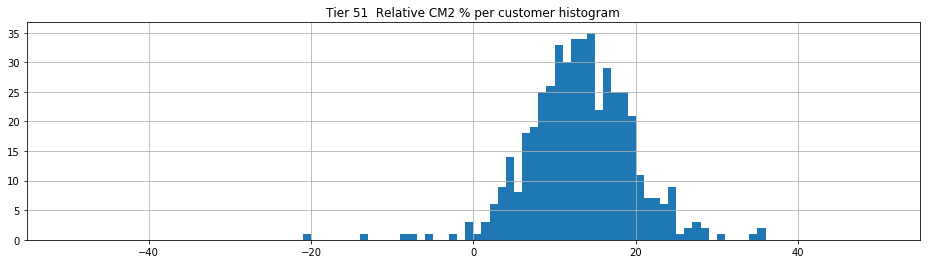

,CM2_REL
count,479.00
mean,13.00
std,7.04
min,-51.45
25%,9.38
50%,13.10
75%,17.10
max,35.87


CM2% threshold >= 5  is the percentile 8.98
CM2% threshold >= 7  is the percentile 14.41
CM2% threshold >=  10.232  is the percentile 30 allowing us to stay with the 70% of our sample


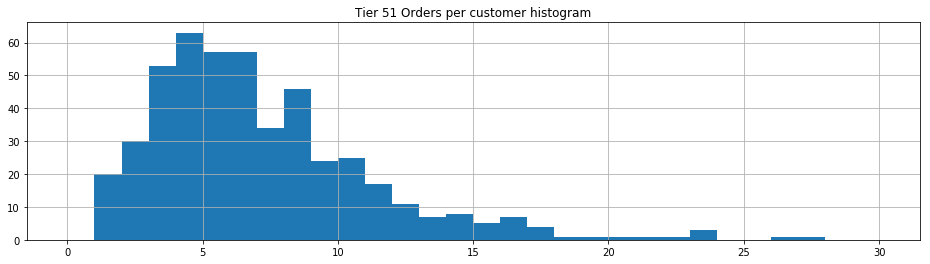

,ORDERS
count,479.00
mean,6.78
std,4.79
min,1.00
25%,4.00
50%,6.00
75%,8.00
max,58.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  71.82  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  67.43  % from our customers
With CM2% threshold >=  10.232  and Orders >=  4.0  we keep eligible a  53.03  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


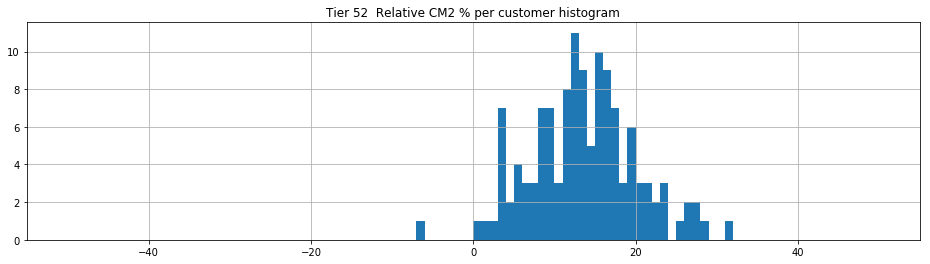

,CM2_REL
count,126.00
mean,13.58
std,6.51
min,-6.93
25%,9.24
50%,13.66
75%,17.41
max,31.24


CM2% threshold >= 5  is the percentile 10.32
CM2% threshold >= 7  is the percentile 15.87
CM2% threshold >=  10.155000000000001  is the percentile 30 allowing us to stay with the 70% of our sample


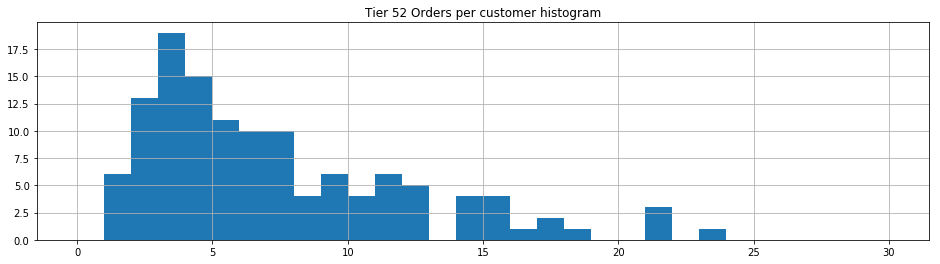

,ORDERS
count,126.00
mean,7.07
std,5.51
min,1.00
25%,3.00
50%,5.00
75%,9.75
max,35.00


3.5  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.5  we keep eligible a  64.29  % from our customers
With CM2% threshold >= 7 and Orders >=  3.5  we keep eligible a  59.52  % from our customers
With CM2% threshold >=  10.155000000000001  and Orders >=  3.5  we keep eligible a  46.03  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


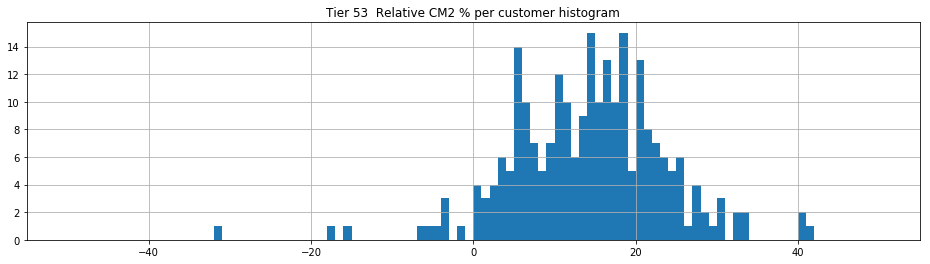

,CM2_REL
count,243.00
mean,14.09
std,9.40
min,-31.73
25%,7.68
50%,14.67
75%,20.24
max,41.51


CM2% threshold >= 5  is the percentile 13.17
CM2% threshold >= 7  is the percentile 23.05
CM2% threshold >=  9.812000000000001  is the percentile 30 allowing us to stay with the 70% of our sample


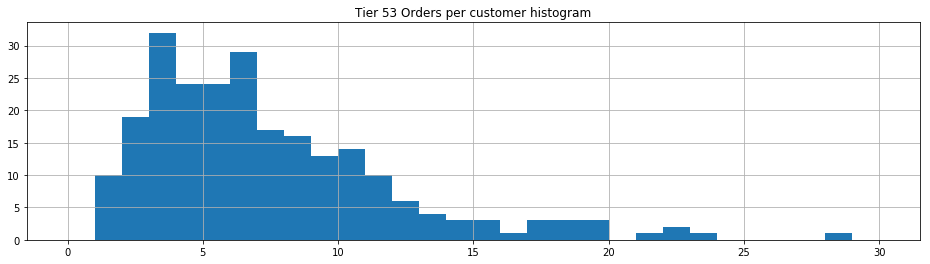

,ORDERS
count,243.00
mean,7.93
std,10.82
min,1.00
25%,3.50
50%,6.00
75%,9.00
max,146.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  66.67  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  59.26  % from our customers
With CM2% threshold >=  9.812000000000001  and Orders >=  4.0  we keep eligible a  53.5  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


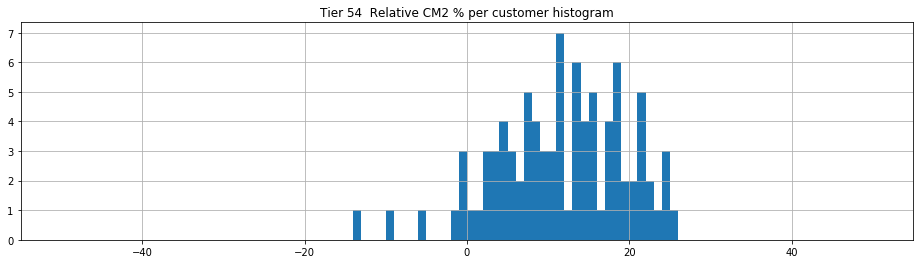

,CM2_REL
count,89.00
mean,11.56
std,7.94
min,-13.52
25%,6.23
50%,11.74
75%,17.98
max,25.73


CM2% threshold >= 5  is the percentile 21.35
CM2% threshold >= 7  is the percentile 26.97
CM2% threshold >=  7.671999999999999  is the percentile 30 allowing us to stay with the 70% of our sample


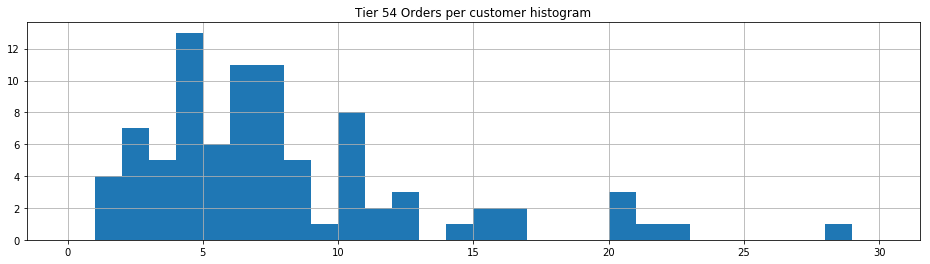

,ORDERS
count,89.00
mean,8.63
std,9.33
min,1.00
25%,4.00
50%,6.00
75%,10.00
max,69.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  62.92  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  57.3  % from our customers
With CM2% threshold >=  7.671999999999999  and Orders >=  4.0  we keep eligible a  56.18  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


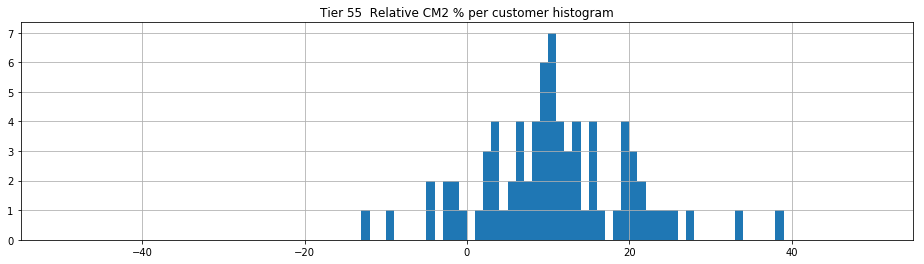

,CM2_REL
count,77.00
mean,10.79
std,9.03
min,-12.84
25%,5.97
50%,10.52
75%,15.86
max,38.89


CM2% threshold >= 5  is the percentile 23.38
CM2% threshold >= 7  is the percentile 31.17
CM2% threshold >=  6.758  is the percentile 30 allowing us to stay with the 70% of our sample


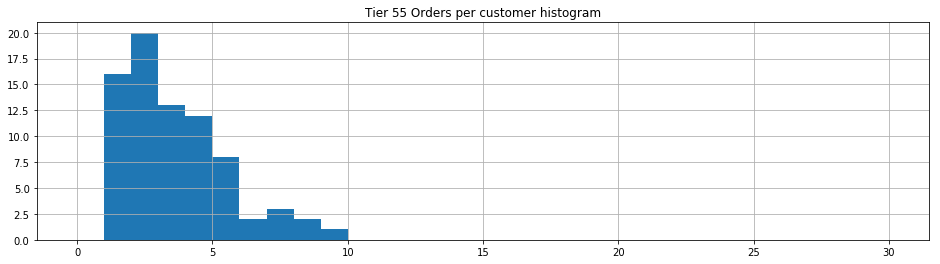

,ORDERS
count,77.00
mean,3.13
std,1.91
min,1.00
25%,2.00
50%,3.00
75%,4.00
max,9.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  59.74  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  55.84  % from our customers
With CM2% threshold >=  6.758  and Orders >=  2.0  we keep eligible a  55.84  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


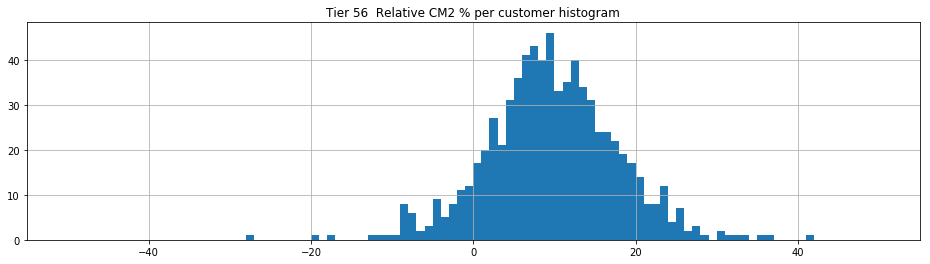

,CM2_REL
count,740.00
mean,9.75
std,8.21
min,-27.74
25%,4.96
50%,9.40
75%,14.72
max,55.81


CM2% threshold >= 5  is the percentile 25.27
CM2% threshold >= 7  is the percentile 35.68
CM2% threshold >=  5.937  is the percentile 30 allowing us to stay with the 70% of our sample


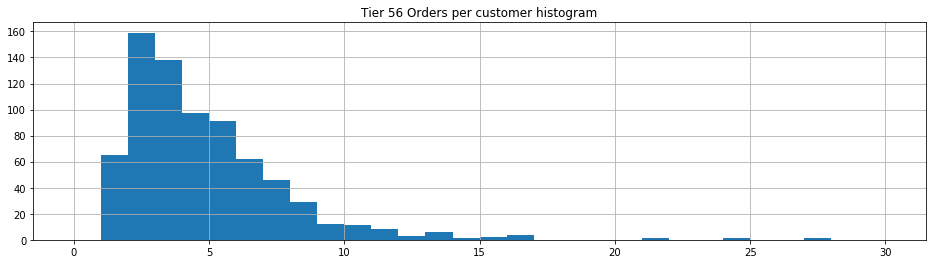

,ORDERS
count,740.00
mean,4.44
std,3.85
min,1.00
25%,2.00
50%,4.00
75%,6.00
max,59.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  68.24  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  58.78  % from our customers
With CM2% threshold >=  5.937  and Orders >=  2.0  we keep eligible a  64.05  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,306.0,60.717594,24.317553,29.088700,45.371446,55.298616,69.754728,237.381344
52,60.0,80.620908,52.054401,32.896086,51.196720,64.128713,85.726561,297.029889
53,137.0,69.621238,32.452206,30.903775,47.966014,59.234086,80.300800,238.387983
54,55.0,89.165706,60.747391,30.710871,54.808499,79.639200,103.334042,432.694643
55,28.0,54.391476,16.656472,35.614175,43.913341,46.563210,63.586765,93.049300
56,348.0,68.242861,45.096959,31.353300,45.672290,56.373642,76.731566,628.105725


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,306.0,12.991699,5.943904,-8.00,9.1500,12.815,16.7075,35.53
52,60.0,13.435167,5.802486,3.01,9.2550,13.310,17.3675,28.43
53,137.0,15.834015,8.691878,-17.13,10.6800,15.560,20.9200,41.51
54,55.0,13.136727,7.402589,-5.27,8.6700,14.350,18.3200,25.73
55,28.0,12.803929,8.395162,-4.22,7.7200,10.980,20.0975,27.89
56,348.0,9.463103,7.154689,-11.47,4.9825,8.980,14.2600,27.12


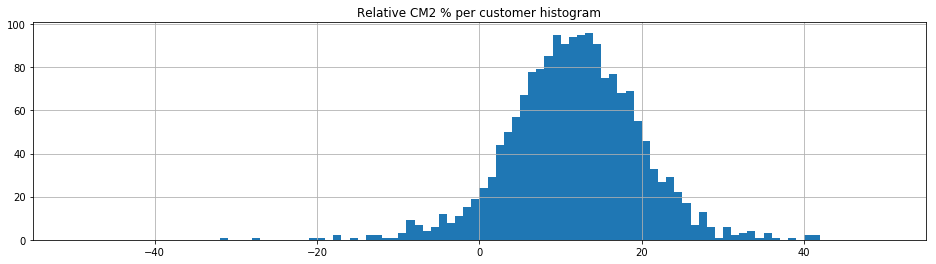

,CM2_REL
count,1754.00
mean,11.65
std,8.19
min,-51.45
25%,6.79
50%,11.75
75%,16.74
max,55.81


CM2% threshold >= 5  is the percentile 17.79
CM2% threshold >= 6  is the percentile 21.61
CM2% threshold >= 7  is the percentile 26.05
CM2% threshold >= 8  is the percentile 30.56
CM2% threshold >= 9  is the percentile 35.4
CM2% threshold >= 10  is the percentile 40.82
CM2% threshold >=  7.877  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

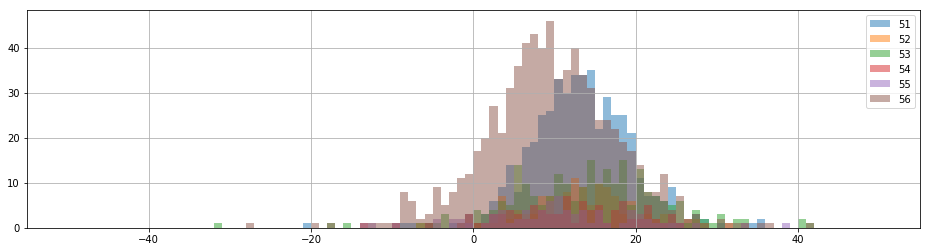

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   